In [1]:
import os

# Get the current working directory
current_directory = os.getcwd()
print("Current Directory:", current_directory)

# Move to the parent directory
parent_directory = os.path.dirname(current_directory)
os.chdir(parent_directory)

# Print the updated working directory
updated_directory = os.getcwd()
print("Updated Directory:", updated_directory)

Current Directory: /mnt/c/users/rjmay/code/research_ms/alt_distr
Updated Directory: /mnt/c/users/rjmay/code/research_ms


In [2]:
! source ../venv/bin/activate

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import math
import pickle
import time



### Simulation stage

In [4]:
from modules.multi_bounds_v3 import bounds_class
# from modules.Bhatt_knn_func import knn_num_calc
from modules.data_gen import data_gen

In [5]:
PICKLED =True

dim_str = "3" # TODO change me 



In [6]:
file_path = 'sim_data/beta_beta' + dim_str +'.pkl' # DONT FORGET TO CHANGE ME IF YOU COPY AND PASTE


    

if PICKLED == True:
    

    # Open the file in binary read mode
    with open(file_path, 'rb') as file:
        # Use pickle.load to deserialize and load the list of objects from the file
        loaded_objects = pickle.load(file)

    print('Loaded object successfully')
    
    [bound_obj_lst, sample_sizes] = loaded_objects

Loaded object successfully


### Using the data



In [7]:
loaded_objects

[[<modules.multi_bounds_parfor.bounds_class at 0x7f88c51d0340>,
 array([  54,   84,  133,  210,  330,  519,  817, 1285, 2021, 3179, 5000])]

In [8]:
# sample_sizes = np.logspace(2, 3.3011, 9 , endpoint = True, dtype = int)
sample_sizes = sample_sizes*2
dpi = 250

In [9]:
lst = [obj() for obj in bound_obj_lst ]

df = pd.DataFrame(lst, index = sample_sizes)

df


/home/rjmay/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/rjmay/.local/lib/python3.10/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


,Dp_lower,Dp_upper,Bha_lower,Bha_upper,Bha_knn_lower,Bha_knn_upper,tight_lower,tight_upper,Maha_upper,inf_lower,inf_upper,enDive_lower,enDive_upper
108,0.120830,0.210671,0.042853,0.197220,0.122401,0.324962,0.158938,0.164962,NaN,0.046172,0.205600,0.084659,0.151782
168,0.109952,0.194643,0.041766,0.196728,0.156133,0.361682,0.190585,0.197761,NaN,0.045074,0.205409,0.062756,0.115976
266,0.103419,0.184737,0.043498,0.201725,0.151868,0.358067,0.185049,0.192054,NaN,0.043661,0.201137,0.053283,0.099935
420,0.099263,0.178405,0.044330,0.204360,0.164955,0.370697,0.195883,0.203291,NaN,0.038425,0.191285,0.058814,0.110177
660,0.092918,0.168333,0.042947,0.201955,0.156020,0.362570,0.186283,0.193363,NaN,0.043693,0.203814,0.062330,0.116617
1038,0.091891,0.166746,0.043650,0.203789,0.155777,0.362458,0.185447,0.192501,NaN,0.038233,0.190495,0.066936,0.124769
1634,0.089284,0.162524,0.043166,0.202873,0.151137,0.358056,0.180600,0.187482,NaN,0.037616,0.190032,0.071331,0.132394
2570,0.088327,0.160990,0.042982,0.202581,0.144811,0.351831,0.174289,0.180942,NaN,0.043515,0.203842,0.074381,0.137639
4042,0.087875,0.160270,0.043288,0.203378,0.139708,0.346629,0.169475,0.175949,NaN,0.037104,0.188586,0.076843,0.141845
6358,0.086882,0.158641,0.042909,0.202557,0.133186,0.339739,0.163335,0.169579,NaN,0.039357,0.194373,0.078198,0.144145


In [30]:
dp_l = []
dp_u = []

Bha_u =[]
Bha_l =[]

Bha_knn_u = []
Bha_knn_l = []

inf_l = []
inf_u = []

enDive_l = []
enDive_u = []


for obj in bound_obj_lst:
    a,b = obj.get_bounds_dp()
    dp_l.append(a)
    dp_u.append(b)
    
    a,b = obj.get_bounds_Bha()
    Bha_l.append(a)
    Bha_u.append(b)

    
    a, b = obj.get_bounds_tight()
    print(np.mean(a), np.mean(b))
    # tight_l.append(a)
    # tight_u.append(b)
    
    a, b= obj.get_bounds_Bha_knn()
    Bha_knn_l.append(a)
    Bha_knn_u.append(b)
    
    a,b = obj.get_inf_bounds()
    inf_l.append(a)
    inf_u.append(b)
    
    a,b = obj.get_Bounds_enDive()
    enDive_l.append(a)
    enDive_u.append(b)
    
    

0.158937800323758 0.16496163052808976
0.1905845553920646 0.19776131051873794
0.18504948968850005 0.19205354282893328
0.19588295616217985 0.20329067589380664
0.1862829959710731 0.19336315126684603
0.1854472491468576 0.19250104379928515
0.1806004866649233 0.1874819456491757
0.1742889739920493 0.1809424613672831
0.16947478330599655 0.17594866758743855
0.16333465439033992 0.16957891724274504
0.1591306268931475 0.16521446363641357


Calculate true values

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import beta
#### I have to code the true values and theoreticals. 

# Define dx and x range
dx = 0.001
x = np.arange(-10, 10 + dx, dx)

# Define the normal distributions
f0 = beta.pdf(x, a=2, b=5)
f1 = beta.pdf(x, a=5, b=2)

# Calculate the minimum of f0 and f1
min_f0_f1 = np.minimum(f0, f1)
# Calculate BER as 0.5 * sum(min(f0, f1) * dx)
BER = 0.5 * np.nansum(min_f0_f1 * dx)

p = 0.5
q = 0.5
pf0 = p * f0
qf1 = q * f1

# Calculate the function
func = (pf0 - qf1)**2 / (pf0 + qf1)

# Calculate dp using numerical integration (sum and dx)
dp = np.nansum(func) * dx

# Calculate upper and lower bounds
upper = 0.5 - 0.5 * dp
lower = 0.5 - 0.5 * np.sqrt(dp)

theory_Dp = [lower, upper]

func2 = np.sqrt(f0 * f1)
# Calculate BC using numerical integration (sum and dx)
BC = np.nansum(func2) * dx

lower = 0.5 - 0.5 * np.sqrt(1 - BC**2)
upper = 0.5 * BC

theory_bha = [lower, upper]


/tmp/ipykernel_17695/2365303086.py:26: RuntimeWarning: invalid value encountered in divide
  func = (pf0 - qf1)**2 / (pf0 + qf1)


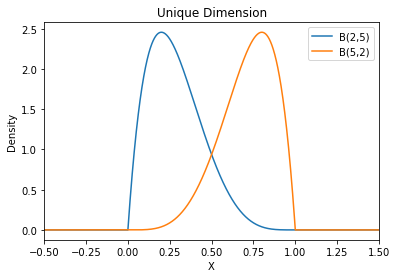

In [12]:
plt.plot(x, f0, label = "B(2,5)")
plt.plot(x, f1, label = "B(5,2)")
plt.title("Unique Dimension")
plt.xlabel("X")
plt.ylabel("Density")
plt.xlim((-.5, 1.5))
plt.legend()
plt.savefig("alt_distr/images/beta_demo.png", facecolor=(1,1,1,1),  bbox_inches='tight')
plt.show()


In [13]:
BER

0.10937546875016925

True value is     0.1094


In [14]:
### this cell helps to fix bugs from not doing the data in here. 
MC_num = len(bound_obj_lst[0])

BER_lst = np.ones(MC_num) * BER



def mse(l1, l2):## numpy lists
    return ((l1 - l2)**2).mean(axis=0)

In [15]:
# cases = len(sample_sizes)

## theoretical MSE
bha_theoretical_l= np.ones(MC_num) * (theory_bha[0])
bha_theoretical_u= np.ones(MC_num) * (theory_bha[1])


dp_theoretical_l= np.ones(MC_num) * theory_Dp[0]
dp_theoretical_u= np.ones(MC_num) * theory_Dp[1]


In [16]:
def mse_v2(true, matrix):
    temp = matrix - true
    temp = temp **2
    return np.mean(temp, axis= 1)
    

In [17]:
# lower_mse_DP =mse_v2(theory_Dp[0], dp_l)
# upper_mse_DP = mse_v2(theory_Dp[1], dp_u)

# lower_mse_Bha = mse_v2(theory_bha[0], Bha_l)
# upper_mse_Bha =mse_v2(theory_bha[1], Bha_u)


# lower_mse_Bha_knn = mse_v2(theory_bha[0], Bha_knn_l)
# upper_mse_Bha_knn =mse_v2(theory_bha[1], Bha_knn_u)

# lower_mse_inf = mse_v2(theory_bha[0], inf_l)
# upper_mse_inf = mse_v2(theory_bha[1], inf_u)

# lower_mse_enDive = mse_v2(theory_Dp[0], enDive_l)
# upper_mse_enDive = mse_v2(theory_Dp[1], enDive_u)


In [18]:
# np.array(Bha_knn_l).shape
for j in enDive_u:
    print(len(j))

400
400
400
400
400
400
400
400
400
400
400


### Plotting

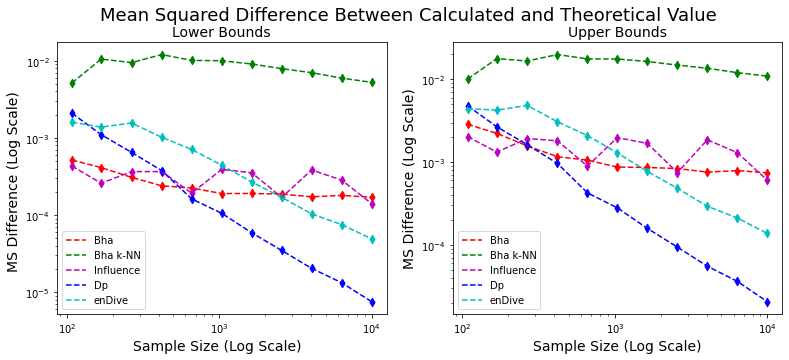

In [19]:
lower_mse_DP =mse_v2(theory_Dp[0], dp_l)
upper_mse_DP = mse_v2(theory_Dp[1], dp_u)

lower_mse_Bha = mse_v2(theory_bha[0], Bha_l)
upper_mse_Bha =mse_v2(theory_bha[1], Bha_u)


lower_mse_Bha_knn = mse_v2(theory_bha[0], Bha_knn_l)
upper_mse_Bha_knn =mse_v2(theory_bha[1], Bha_knn_u)

lower_mse_inf = mse_v2(theory_bha[0], inf_l)
upper_mse_inf = mse_v2(theory_bha[1], inf_u)

lower_mse_enDive = mse_v2(theory_Dp[0], enDive_l)
upper_mse_enDive = mse_v2(theory_Dp[1], enDive_u)


fs =14

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13, 5))
st = fig.suptitle("Mean Squared Difference Between Calculated and Theoretical Value", fontsize=fs+4)
ax = axes[0]


ax.set_xscale('log', base=10)
ax.set_yscale('log', base=10)

ax.plot(sample_sizes, lower_mse_Bha,'r--', label='Bha')
ax.scatter(sample_sizes, lower_mse_Bha, color = 'red', marker = 'd')

ax.plot(sample_sizes, lower_mse_Bha_knn, color = 'green',linestyle="--",  label = "Bha k-NN")
ax.scatter(sample_sizes, lower_mse_Bha_knn, color = 'g', marker = 'd')

ax.plot(sample_sizes, lower_mse_inf,  'm--', label='Influence')
ax.scatter(sample_sizes, lower_mse_inf,  color='m', marker='d')

ax.plot(sample_sizes, lower_mse_DP,  'b--', label='Dp')
ax.scatter(sample_sizes, lower_mse_DP,  color='b', marker='d')


ax.plot(sample_sizes, lower_mse_enDive,  'c--', label='enDive')
ax.scatter(sample_sizes, lower_mse_enDive,  color='c', marker='d')

ax.set_xlabel("Sample Size (Log Scale)  ", fontsize = fs)
ax.set_ylabel("MS Difference (Log Scale) ", fontsize=fs)
ax.set_title("Lower Bounds", fontsize = fs)



ax.legend()

ax = axes[1]

ax.set_xscale('log', base=10)
ax.set_yscale('log', base=10)

ax.plot(sample_sizes, upper_mse_Bha,'r--', label='Bha')
ax.scatter(sample_sizes, upper_mse_Bha, color = 'red', marker = 'd')


ax.plot(sample_sizes, upper_mse_Bha_knn, color = 'g',  linestyle  = "--", label = "Bha k-NN")
ax.scatter(sample_sizes, upper_mse_Bha_knn, color = 'g', marker = 'd')

ax.plot(sample_sizes, upper_mse_inf,  'm--', label='Influence')
ax.scatter(sample_sizes, upper_mse_inf,  color='m', marker='d')


ax.plot(sample_sizes, upper_mse_DP,  'b--', label='Dp')
ax.scatter(sample_sizes, upper_mse_DP,  color='b', marker='d')


ax.plot(sample_sizes, upper_mse_enDive,  'c--', label='enDive')
ax.scatter(sample_sizes, upper_mse_enDive,  color='c', marker='d')

ax.set_xlabel("Sample Size (Log Scale)", fontsize = fs)
ax.set_ylabel("MS Difference (Log Scale)", fontsize=fs)
ax.set_title("Upper Bounds", fontsize = fs)

ax.legend()

file_name = r"alt_distr/images/beta_beta_MSE" + dim_str + ".png"
# plt.savefig(file_name,facecolor=(1,1,1,1),  bbox_inches='tight', dpi= dpi)
plt.show()

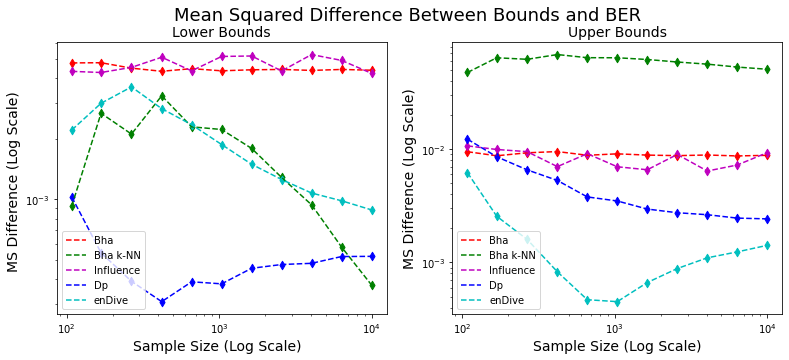

In [20]:
lower_mse_DP_BER =mse_v2(BER, dp_l)
upper_mse_DP_BER = mse_v2(BER, dp_u)

lower_mse_Bha_BER = mse_v2(BER, Bha_l)
upper_mse_Bha_BER =mse_v2(BER, Bha_u)


lower_mse_Bha_knn_BER = mse_v2(BER, Bha_knn_l)
upper_mse_Bha_knn_BER =mse_v2(BER, Bha_knn_u)

lower_mse_inf_BER = mse_v2(BER, inf_l)
upper_mse_inf_BER = mse_v2(BER, inf_u)

lower_mse_enDive_BER = mse_v2(BER, enDive_l)
upper_mse_enDive_BER = mse_v2(BER, enDive_u)

fs =14

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13, 5))
st = fig.suptitle("Mean Squared Difference Between Bounds and BER", fontsize=fs+4)
ax = axes[0]


ax.set_xscale('log', base=10)
ax.set_yscale('log', base=10)

ax.plot(sample_sizes, lower_mse_Bha_BER,'r--', label='Bha')
ax.scatter(sample_sizes, lower_mse_Bha_BER, color = 'red', marker = 'd')

ax.plot(sample_sizes, lower_mse_Bha_knn_BER, color = 'green',linestyle="--",  label = "Bha k-NN")
ax.scatter(sample_sizes, lower_mse_Bha_knn_BER, color = 'g', marker = 'd')

ax.plot(sample_sizes, lower_mse_inf_BER,  'm--', label='Influence')
ax.scatter(sample_sizes, lower_mse_inf_BER,  color='m', marker='d')

ax.plot(sample_sizes, lower_mse_DP_BER,  'b--', label='Dp')
ax.scatter(sample_sizes, lower_mse_DP_BER,  color='b', marker='d')


ax.plot(sample_sizes, lower_mse_enDive_BER,  'c--', label='enDive')
ax.scatter(sample_sizes, lower_mse_enDive_BER,  color='c', marker='d')

ax.set_xlabel("Sample Size (Log Scale)  ", fontsize = fs)
ax.set_ylabel("MS Difference (Log Scale) ", fontsize=fs)
ax.set_title("Lower Bounds", fontsize = fs)


ax.legend()

ax = axes[1]

ax.set_xscale('log', base=10)
ax.set_yscale('log', base=10)

ax.plot(sample_sizes, upper_mse_Bha_BER,'r--', label='Bha')
ax.scatter(sample_sizes, upper_mse_Bha_BER, color = 'red', marker = 'd')


ax.plot(sample_sizes, upper_mse_Bha_knn_BER, color = 'g',  linestyle  = "--", label = "Bha k-NN")
ax.scatter(sample_sizes, upper_mse_Bha_knn_BER, color = 'g', marker = 'd')

ax.plot(sample_sizes, upper_mse_inf_BER,  'm--', label='Influence')
ax.scatter(sample_sizes, upper_mse_inf_BER,  color='m', marker='d')


ax.plot(sample_sizes, upper_mse_DP_BER,  'b--', label='Dp')
ax.scatter(sample_sizes, upper_mse_DP_BER,  color='b', marker='d')


ax.plot(sample_sizes, upper_mse_enDive_BER,  'c--', label='enDive')
ax.scatter(sample_sizes, upper_mse_enDive_BER,  color='c', marker='d')

ax.set_xlabel("Sample Size (Log Scale)", fontsize = fs)
ax.set_ylabel("MS Difference (Log Scale)", fontsize=fs)
ax.set_title("Upper Bounds", fontsize = fs )

ax.legend()

file_name = r"alt_distr/images/beta_beta_MSE2"+ dim_str+ ".png"
# plt.savefig(file_name,facecolor=(1,1,1,1),  bbox_inches='tight', dpi= dpi)
plt.show()

Bhattacharyya, Bha Knn, influence same theoretically

Dp, enDive

In [21]:
BER

0.10937546875016925

In [22]:
lst = [obj.validity(BER) for obj in bound_obj_lst ]

df_valid = pd.DataFrame(lst, index = sample_sizes)

df_valid


,Dp_lower,Dp_upper,Bha_lower,Bha_upper,Bha_knn_lower,Bha_knn_upper,tight_lower,tight_upper,inf_lower,inf_upper,enDive_lower,enDive_upper,Dp,Bha,Bha_knn,tight,inf,enDive
108,0.4200,0.9950,0.9975,0.9825,0.3275,1.0,0.04,0.97,0.9975,1.0,0.7275,0.7400,0.4150,0.9800,0.3275,0.01,0.9975,0.4675
168,0.4975,0.9950,1.0000,0.9975,0.0125,1.0,0.00,1.00,1.0000,1.0,0.9475,0.5600,0.4925,0.9975,0.0125,0.00,1.0000,0.5075
266,0.6250,0.9925,1.0000,1.0000,0.0025,1.0,0.00,1.00,1.0000,1.0,0.9925,0.3875,0.6175,1.0000,0.0025,0.00,1.0000,0.3800
420,0.7750,1.0000,1.0000,1.0000,0.0000,1.0,0.00,1.00,1.0000,1.0,0.9975,0.5075,0.7750,1.0000,0.0000,0.00,1.0000,0.5050
660,0.9400,1.0000,1.0000,1.0000,0.0000,1.0,0.00,1.00,1.0000,1.0,1.0000,0.6200,0.9400,1.0000,0.0000,0.00,1.0000,0.6200
1038,0.9775,1.0000,1.0000,1.0000,0.0000,1.0,0.00,1.00,1.0000,1.0,1.0000,0.8500,0.9775,1.0000,0.0000,0.00,1.0000,0.8500
1634,1.0000,1.0000,1.0000,1.0000,0.0000,1.0,0.00,1.00,1.0000,1.0,1.0000,0.9800,1.0000,1.0000,0.0000,0.00,1.0000,0.9800
2570,1.0000,1.0000,1.0000,1.0000,0.0000,1.0,0.00,1.00,1.0000,1.0,1.0000,1.0000,1.0000,1.0000,0.0000,0.00,1.0000,1.0000
4042,1.0000,1.0000,1.0000,1.0000,0.0000,1.0,0.00,1.00,1.0000,1.0,1.0000,1.0000,1.0000,1.0000,0.0000,0.00,1.0000,1.0000
6358,1.0000,1.0000,1.0000,1.0000,0.0000,1.0,0.00,1.00,1.0000,1.0,1.0000,1.0000,1.0000,1.0000,0.0000,0.00,1.0000,1.0000


In [23]:
def add_noise_to_df(df, noise_level=0.01):
    """
    Add random noise to each column in a DataFrame.
    
    Parameters:
    - df: pandas DataFrame containing the data to which noise will be added.
    
    Returns:
    - pandas DataFrame with noise added to each column.
    """
    # Create a copy of the DataFrame to avoid modifying the original
    df_noisy = df.copy()
    
    # Iterate through each column in the DataFrame
    for col in df.columns:
        # Calculate the range of the data in the column
#         data_range = df[col].max() - df[col].min()
        
        # Generate random noise from a normal distribution
#         noise = np.random.normal(0, noise_level * data_range, len(df[col]))
        noise = np.random.normal(0, noise_level )
#         noise = np.random.uniform(-1 * noise_level, noise_level)
        # Add the noise to the data in the column
        df_noisy[col] = df[col] + noise
    
    return df_noisy


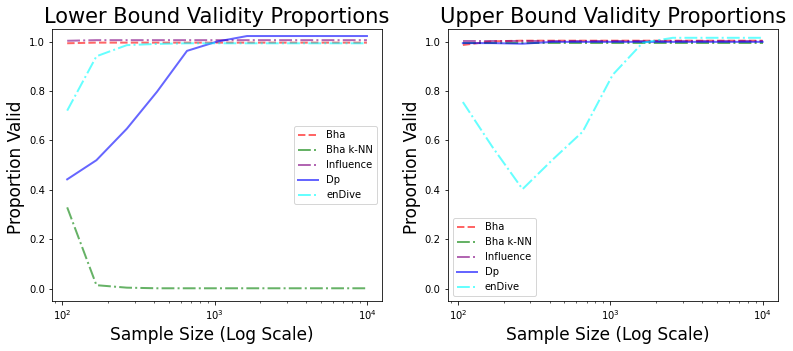

In [24]:
df_noise = add_noise_to_df(df_valid, .008)

fs =17
overlapping = 0.6
lw = 2

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13, 5))

ax = axes[0]

ax.set_xscale('log', base=10)
# ax.set_yscale('log', base=10)


ax.plot(df_noise["Bha_lower"],'r--', label='Bha', alpha = overlapping, linewidth=lw )

ax.plot(df_noise["Bha_knn_lower"],'g-.', label='Bha k-NN', alpha = overlapping, linewidth = lw)

ax.plot(df_noise["inf_lower"],'purple',ls = "-.", label='Influence', alpha = overlapping, linewidth = lw)

ax.plot(df_noise["Dp_lower"], 'b-',  label='Dp', alpha = overlapping, linewidth = lw)

ax.plot(df_noise["enDive_lower"],'cyan',ls = "-.", label='enDive', alpha = overlapping, linewidth = lw)


# ax.plot(df_valid["tight_lower"],'orange', label='Tight  ')


# ax.plot(sample_sizes, validity_tight_u/ MC_num,  label='Upper Tight Validity ')
# ax.set_xticks(sample_sizes)
ax.set_ylim(-0.05,1.05)
ax.set_xlabel("Sample Size (Log Scale)  ", fontsize = fs)
ax.set_ylabel("Proportion Valid ", fontsize=fs)
ax.set_title("Lower Bound Validity Proportions" , fontsize = fs +4)
ax.legend()


ax = axes[1]

ax.set_xscale('log', base=10)
# ax.set_yscale('log', base=10)

ax.plot(df_noise["Bha_upper"],'r--', label='Bha', alpha = overlapping, linewidth = lw)

ax.plot(df_noise["Bha_knn_upper"],'g-.', label='Bha k-NN', alpha = overlapping, linewidth = lw)

ax.plot(df_noise["inf_upper"],'purple',ls = "-.", label='Influence', alpha = overlapping, linewidth =lw)

ax.plot(df_noise["Dp_upper"], 'b-',  label='Dp', alpha = overlapping, linewidth = lw)

ax.plot(df_noise["enDive_upper"],'cyan',ls = "-.", label='enDive', alpha = overlapping, linewidth = lw)


# ax.set_xticks(sample_sizes)
ax.set_xlabel("Sample Size (Log Scale)  ", fontsize = fs)
ax.set_ylabel("Proportion Valid ", fontsize=fs)
ax.set_ylim(-0.05,1.05)
ax.set_title("Upper Bound Validity Proportions" , fontsize = fs +4)
ax.legend()

# plt.subplots_adjust(left=0.05, right=0.96, bottom=0.1, top=0.90)


file_name = r"alt_distr/images/beta_beta_validity" + dim_str+ ".png"
# plt.savefig(file_name,facecolor=(1,1,1,1),  bbox_inches='tight', dpi= dpi)
plt.show()



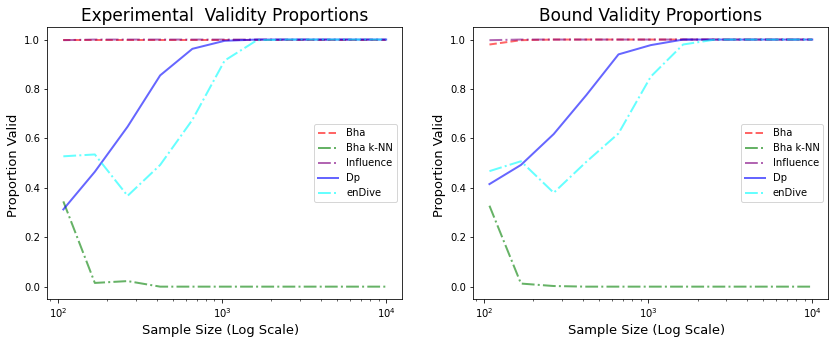

In [25]:
fs =13

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))
ax = axes[1]
ax1 = ax

ax.set_xscale('log', base=10)
# ax.set_yscale('log', base=10)


ax.plot(df_valid["Bha"],'r--', label='Bha', alpha = overlapping, linewidth=lw )
ax.plot(df_valid["Bha_knn"],'g-.', label='Bha k-NN', alpha = overlapping, linewidth = lw)
ax.plot(df_valid["inf"],'purple',ls = "-.", label='Influence', alpha = overlapping, linewidth = lw)
ax.plot(df_valid["Dp"], 'b-',  label='Dp', alpha = overlapping, linewidth = lw)
ax.plot(df_valid["enDive"],'cyan',ls = "-.", label='enDive', alpha = overlapping, linewidth = lw)

# ax.set_xticks(sample_sizes)
ax.set_xlabel("Sample Size (Log Scale)  ", fontsize = fs)
ax.set_ylabel("Proportion Valid ", fontsize=fs)
ax.set_ylim(-0.05,1.05)
ax.set_title("Bound Validity Proportions" , fontsize = fs +4)
ax.legend()


lst = [obj.experimental_validity() for obj in bound_obj_lst ]
df_valid2 = pd.DataFrame(lst, index = sample_sizes)

ax = axes[0]

# df_noise2 = add_noise_to_df(df_valid2, .008)


ax = axes[0]
ax1 = ax

ax.set_xscale('log', base=10)
# ax.set_yscale('log', base=10)


ax.plot(df_valid2["Bha"],'r--', label='Bha', alpha = overlapping, linewidth=lw )
ax.plot(df_valid2["Bha_knn"],'g-.', label='Bha k-NN', alpha = overlapping, linewidth = lw)
ax.plot(df_valid2["inf"],'purple',ls = "-.", label='Influence', alpha = overlapping, linewidth = lw)
ax.plot(df_valid2["Dp"], 'b-',  label='Dp', alpha = overlapping, linewidth = lw)
ax.plot(df_valid2["enDive"],'cyan',ls = "-.", label='enDive', alpha = overlapping, linewidth = lw)

# ax.set_xticks(sample_sizes)
ax.set_xlabel("Sample Size (Log Scale)  ", fontsize = fs)
ax.set_ylabel("Proportion Valid ", fontsize=fs)
ax.set_ylim(-0.05,1.05)
ax.set_title("Experimental  Validity Proportions" , fontsize = fs +4)
ax.legend()

plt.show()


### Master Figure

In [26]:
lst = [obj.bound_width() for obj in bound_obj_lst ]

bound_width_df = pd.DataFrame(lst, index = sample_sizes)

bound_width_df.head()

,Dp,Bha,Bha_knn,tight,inf,enDive
108,0.089841,0.154366,0.202561,0.006024,0.159428,0.067124
168,0.084691,0.154962,0.205548,0.007177,0.160335,0.053220
266,0.081318,0.158227,0.206199,0.007004,0.157476,0.046652
420,0.079142,0.160030,0.205743,0.007408,0.152860,0.051362
660,0.075415,0.159009,0.206550,0.007080,0.160121,0.054287


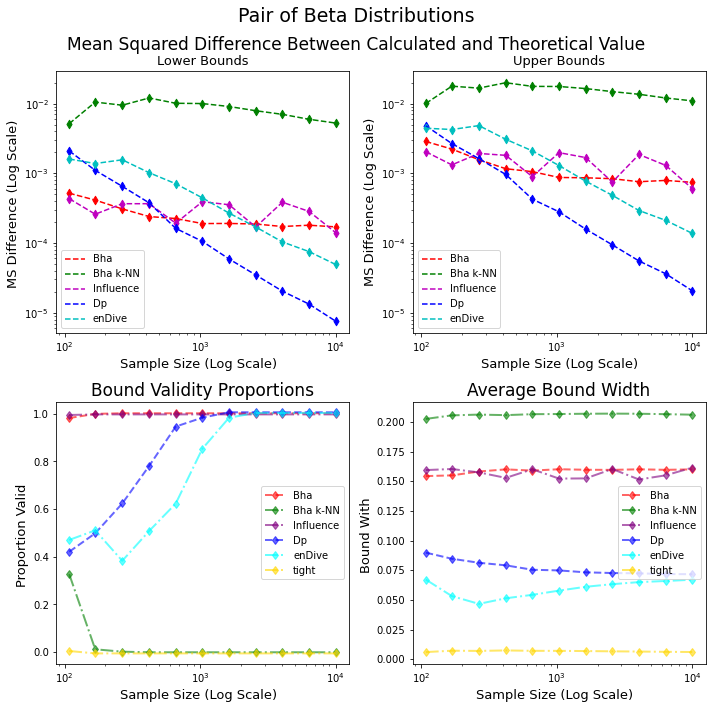

In [27]:
fs =13

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
st = fig.suptitle("Pair of Beta Distributions", fontsize=fs+6)

fig.text(0.5, 0.92, "Mean Squared Difference Between Calculated and Theoretical Value", ha='center', fontsize=fs+4 )

# Manually share y-axis between axes[0][0] and axes[0][1]
axes[0][1].get_shared_y_axes().join(axes[0][0], axes[0][1])


ax = axes[0][0]


ax.set_xscale('log', base=10)
ax.set_yscale('log', base=10)

ax.plot(sample_sizes, lower_mse_Bha,'r--', label='Bha')
ax.scatter(sample_sizes, lower_mse_Bha, color = 'red', marker = 'd')

ax.plot(sample_sizes, lower_mse_Bha_knn, color = 'green',linestyle="--",  label = "Bha k-NN")
ax.scatter(sample_sizes, lower_mse_Bha_knn, color = 'g', marker = 'd')

ax.plot(sample_sizes, lower_mse_inf,  'm--', label='Influence')
ax.scatter(sample_sizes, lower_mse_inf,  color='m', marker='d')

ax.plot(sample_sizes, lower_mse_DP,  'b--', label='Dp')
ax.scatter(sample_sizes, lower_mse_DP,  color='b', marker='d')


ax.plot(sample_sizes, lower_mse_enDive,  'c--', label='enDive')
ax.scatter(sample_sizes, lower_mse_enDive,  color='c', marker='d')

ax.set_xlabel("Sample Size (Log Scale)  ", fontsize = fs)
ax.set_ylabel("MS Difference (Log Scale) ", fontsize=fs)
ax.set_title("Lower Bounds", fontsize = fs)


ax.legend()

ax = axes[0][1]

ax.set_xscale('log', base=10)
ax.set_yscale('log', base=10)

ax.plot(sample_sizes, upper_mse_Bha,'r--', label='Bha')
ax.scatter(sample_sizes, upper_mse_Bha, color = 'red', marker = 'd')


ax.plot(sample_sizes, upper_mse_Bha_knn, color = 'g',  linestyle  = "--", label = "Bha k-NN")
ax.scatter(sample_sizes, upper_mse_Bha_knn, color = 'g', marker = 'd')

ax.plot(sample_sizes, upper_mse_inf,  'm--', label='Influence')
ax.scatter(sample_sizes, upper_mse_inf,  color='m', marker='d')


ax.plot(sample_sizes, upper_mse_DP,  'b--', label='Dp')
ax.scatter(sample_sizes, upper_mse_DP,  color='b', marker='d')


ax.plot(sample_sizes, upper_mse_enDive,  'c--', label='enDive')
ax.scatter(sample_sizes, upper_mse_enDive,  color='c', marker='d')

ax.set_xlabel("Sample Size (Log Scale)", fontsize = fs)
ax.set_ylabel("MS Difference (Log Scale)", fontsize=fs)
ax.set_title("Upper Bounds", fontsize = fs)
ax.legend()


ax = axes[1][0]
ax1 = ax

ax.set_xscale('log', base=10)
# ax.set_yscale('log', base=10)


ax.plot(df_noise["Bha"], 'r--d', label='Bha', alpha=overlapping, linewidth=lw)
ax.plot(df_noise["Bha_knn"], 'g-.d', label='Bha k-NN', alpha=overlapping, linewidth=lw)
ax.plot(df_noise["inf"], color='purple', linestyle='-.', marker='d', label='Influence', alpha=overlapping, linewidth=lw)
ax.plot(df_noise["Dp"], 'b--d', label='Dp', alpha=overlapping, linewidth=lw)
ax.plot(df_noise["enDive"], color = 'cyan', linestyle='-.', marker ='d', label='enDive', alpha=overlapping, linewidth=lw)

ax.plot(df_noise["tight"],color = 'gold',ls = "-.", marker = 'd',label='tight', alpha = overlapping, linewidth = lw)


# ax.set_xticks(sample_sizes)
ax.set_xlabel("Sample Size (Log Scale)  ", fontsize = fs)
ax.set_ylabel("Proportion Valid ", fontsize=fs)
ax.set_ylim(-0.05,1.05)
ax.set_title("Bound Validity Proportions" , fontsize = fs +4)
ax.legend()


ax = axes[1][1]

ax.set_xscale('log', base=10)
# ax.set_yscale('log', base=10)


ax.plot(bound_width_df["Bha"],'r--d', label='Bha', alpha = overlapping, linewidth=lw )
ax.plot(bound_width_df["Bha_knn"],'g-.d', label='Bha k-NN', alpha = overlapping, linewidth = lw)
ax.plot(bound_width_df["inf"],color = 'purple',ls = "-.", marker= 'd', label='Influence', alpha = overlapping, linewidth = lw)
ax.plot(bound_width_df["Dp"], 'b--d',  label='Dp', alpha = overlapping, linewidth = lw)
ax.plot(bound_width_df["enDive"],color = 'cyan',ls = "-.", marker = 'd',label='enDive', alpha = overlapping, linewidth = lw)
ax.plot(bound_width_df["tight"],color = 'gold',ls = "-.", marker = 'd',label='tight', alpha = overlapping, linewidth = lw)



# ax.set_xticks(sample_sizes)
ax.set_xlabel("Sample Size (Log Scale)  ", fontsize = fs)
ax.set_ylabel("Bound With ", fontsize=fs)
# ax.set_ylim(0.0, 0.3)
ax.set_title("Average Bound Width" , fontsize = fs +4)
ax.legend()


fig.tight_layout(rect=[0, 0, 1, 0.97])  # Leave space for the common title



file_name = r"alt_distr/images/beta_beta_master" + dim_str +  ".png"
# plt.savefig(file_name,facecolor=(1,1,1,1),  bbox_inches='tight', dpi= dpi)
plt.show()